# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from datetime import datetime
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import MinMaxScaler
import datetime


In [3]:
df_Accidents = pd.read_csv("/Users/mohannadhosam/Downloads/Machine learning project/2002_Accidents_UK.csv",index_col=0,low_memory=False)
pd.set_option('display.max_columns',None)


## 2 - EDA 

In [4]:
df_Accidents.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2,1,01/01/2002,Tuesday,14:55,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866
200201BS00002,2002,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2,2,01/01/2002,Tuesday,03:10,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840
200201BS00003,2002,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1,1,02/01/2002,Wednesday,14:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852
200201BS00004,2002,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2,1,03/01/2002,Thursday,16:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865
200201BS00005,2002,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2,1,03/01/2002,Thursday,08:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835


To check the shape of our data frame

In [5]:
df_Accidents.shape

(221751, 35)

Number of Non-null values in columns and their datatype 

In [6]:
df_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221751 entries, 200201BS00001 to 2002984055602
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                221751 non-null  int64  
 1   accident_reference                           221751 non-null  object 
 2   location_easting_osgr                        221286 non-null  float64
 3   location_northing_osgr                       221286 non-null  float64
 4   longitude                                    221286 non-null  float64
 5   latitude                                     221286 non-null  float64
 6   police_force                                 221751 non-null  object 
 7   accident_severity                            221751 non-null  object 
 8   number_of_vehicles                           221751 non-null  int64  
 9   number_of_casualties                         

Some statistics of the data

In [7]:
df_Accidents.describe() 

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,221751.0,221286.000000,2.212860e+05,221286.000000,221286.000000,221751.000000,221751.000000,221751.000000
mean,2002.0,438741.707609,3.000347e+05,-1.449547,52.588520,1.841367,1.364616,39.502911
std,0.0,94125.535604,1.588064e+05,1.383995,1.429982,0.735153,0.852720,14.301647
min,2002.0,63510.000000,1.030000e+04,-7.536169,49.912958,1.000000,1.000000,10.000000
25%,2002.0,376450.000000,1.790800e+05,-2.354445,51.497989,1.000000,1.000000,30.000000
50%,2002.0,437825.000000,2.725500e+05,-1.434852,52.339544,2.000000,1.000000,30.000000
75%,2002.0,522220.000000,3.977400e+05,-0.230436,53.474958,2.000000,1.000000,60.000000
max,2002.0,655120.000000,1.213700e+06,1.755793,60.801663,32.000000,71.000000,70.000000


Some statistics of categorical data

In [8]:
df_Accidents.describe(include = 'object') 

,accident_reference,police_force,accident_severity,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,221751,221751,221751,221751,221751,221751,221751,221751,221751,221751,221746,220633,221751,221751,221751,131993,221751,221751,221751,218818,221751,221751,221751,221751,221751,221751,221751
unique,221751,51,3,365,7,1440,408,381,208,6,3448,4,10,5,7,2829,4,7,5,9,8,7,7,3,3,3,29694
top,01BS00001,Metropolitan Police,Slight,26/04/2002,Friday,17:00,Birmingham,Birmingham,Kent,A,first_road_class is C or Unclassified. These r...,Single carriageway,Not at junction or within 20 metres,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,-1
freq,1,33619,188106,991,37744,2240,4569,4569,5272,102378,82755,164830,87457,110196,90619,101842,220649,188098,158912,170041,140096,217176,215585,143771,160931,181205,24786


QUESTIONS 

First Question

The percentage of null values in every column

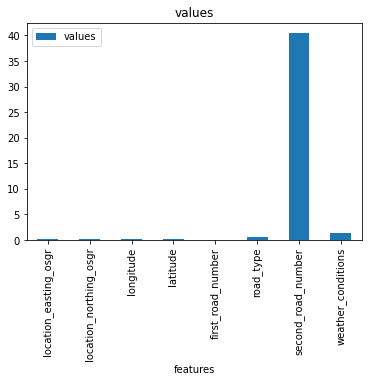

In [9]:
perc_null_mean = df_Accidents.isnull().mean()* 100 
null_df = pd.DataFrame( {'features' : perc_null_mean.index,'values':perc_null_mean.values })
null_df = null_df[ null_df['values'] > 0 ]
null_df.plot.bar(x="features", subplots=True,width=0.5);

As shown in the figure above, The second road number feature contains the most null values, while the first road number has the least number of null values.

Second question 


The number of numerical and categorical variables 

In [10]:
numerical  = df_Accidents.select_dtypes(include = ['int64','float'])
print('numerical dataset: ',numerical.shape[1])
cat  = df_Accidents.select_dtypes(include = 'object')
print('categorical dataset: ',cat.shape[1])

numerical dataset:  8
categorical dataset:  27


As shown above our data set contains 8 numerical variables and 27 categorical variables

Third Question 


Which area had the most accidents?

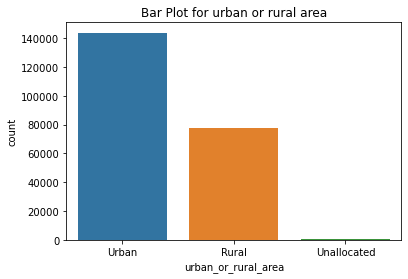

In [11]:
sns.countplot(x = df_Accidents["urban_or_rural_area"])
plt.title('Bar Plot for urban or rural area')
plt.show()

As shown in the figure above, urban areas had the most accidents 

Fourth Question

Which day has the most accidents?

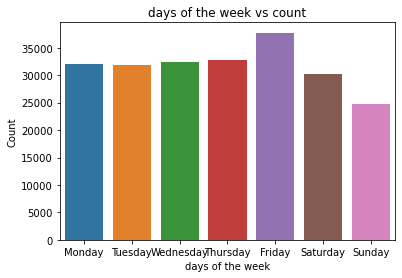

In [12]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x = df_Accidents.day_of_week,order = order)
plt.xlabel('days of the week')
plt.ylabel('Count')
plt.title('days of the week vs count')
plt.show()

As shown in the figure above, friday had the most accidents 

Fifth Question

Do most accidents happen at night ?

Daylight    158912
Darkness     62839
Name: light_conditions, dtype: int64


<AxesSubplot:xlabel='light_conditions', ylabel='count'>

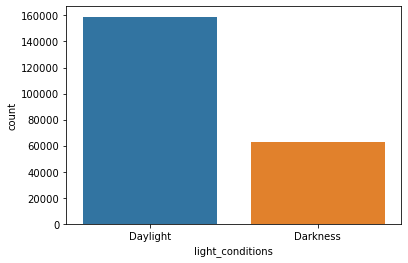

In [13]:
col = df_Accidents['light_conditions'].apply(lambda x: x.split(' ')[0])
print(col.value_counts())
sns.countplot(x = col)

No, most accidents did not happen at night, as shown above 

## PreProcessing of data

# 3 - Cleaning Data

## Observing Missing and duplicate Data

1) Observing Missing Data

In [14]:
df_Accidents.isnull().sum()

accident_year                                      0
accident_reference                                 0
location_easting_osgr                            465
location_northing_osgr                           465
longitude                                        465
latitude                                         465
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  5
road_type                                     

8 Features has missing values, so we should deal with them


Other than those 8 features, We have some features that contain ( -1, unclassified) and we should deal with them.
Those features are:

In [15]:
df_Accidents['first_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     82755
1.0                                                                                                      2951
6.0                                                                                                      2412
4.0                                                                                                      1994
25.0                                                                                                     1428
                                                                                                        ...  
5212.0                                                                                                      1
5352.0                                                                                                      1
9037.0                                                                                                      1
9049.0    

In [16]:
df_Accidents["second_road_number"].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     101842
1.0                                                                                                        463
4.0                                                                                                        375
40.0                                                                                                       297
6.0                                                                                                        271
                                                                                                         ...  
3143.0                                                                                                       1
3159.0                                                                                                       1
3164.0                                                                                                       1
3

In [17]:
df_Accidents["second_road_class"].value_counts()

Unclassified    90619
-1              89740
A               20498
C               11223
B                8039
Motorway         1480
A(M)              152
Name: second_road_class, dtype: int64

2) Observing duplicate data

In [18]:
duplicates = df_Accidents.duplicated().sum()
duplicates

0

## Handling Missing data

1) Handling Null Values

1- (location_easting_osgr, location_northing_osgr,longitude,latitude)

Those 4 variables contain the same number of missing values, so they can be dealed the same

In [19]:
df_Accidents[df_Accidents.location_easting_osgr.isnull()]["lsoa_of_accident_location"].value_counts()

-1    465
Name: lsoa_of_accident_location, dtype: int64

In [20]:
df_Accidents[df_Accidents.location_northing_osgr.isnull()]["lsoa_of_accident_location"].value_counts()

-1    465
Name: lsoa_of_accident_location, dtype: int64

In [21]:
df_Accidents[df_Accidents.latitude.isnull()]["lsoa_of_accident_location"].value_counts()


-1    465
Name: lsoa_of_accident_location, dtype: int64

In [22]:
df_Accidents[df_Accidents.longitude.isnull()]["lsoa_of_accident_location"].value_counts()

-1    465
Name: lsoa_of_accident_location, dtype: int64

Those 4 feautres have a relation with the feature called "lsoa_of_accident_location". When the 4 features were null, the value of the "lsoa_of_accident_location"is = -1. So The 4 features are Missing at random ( MAR) 

Since the percentage of this for 4 features is less than 5 %, Complete Case Analysis (CCA) is applied

2) First Road Number

In [23]:
print(df_Accidents.first_road_number.isnull().sum())

5


First Road Number has only 5 missing values so we will use CCA to deal with and it is missing completely at random because it has 5 null values only

3) Road Type

In [24]:
print(df_Accidents.road_type.isnull().sum())

1118


The percentage of null values in road type is less than 5% so we will use CCA again. and it is missing completely at random because there is no relation with another feature

4)Weather conditions

In [25]:
print(df_Accidents.weather_conditions.isnull().sum())

2933


The percentage of null values in weather conditions is less than 5% so we will use CCA again. and it is missing completely at random because there is no relation with another feature

CCA for the 7 null features above

In [26]:
Removed_rows = df_Accidents.dropna(subset = ["location_easting_osgr","location_northing_osgr","longitude","latitude","first_road_number","weather_conditions","road_type"],axis = 0)
Removed_rows

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2,1,01/01/2002,Tuesday,14:55,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866
200201BS00002,2002,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2,2,01/01/2002,Tuesday,03:10,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840
200201BS00003,2002,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1,1,02/01/2002,Wednesday,14:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852
200201BS00004,2002,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2,1,03/01/2002,Thursday,16:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865
200201BS00005,2002,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2,1,03/01/2002,Thursday,08:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002984051202,2002,984051202,308500.0,598400.0,-3.441702,55.271253,Dumfries and Galloway,Slight,1,1,19/12/2002,Thursday,12:00,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,7076.0,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2002984051302,2002,984051302,317840.0,566390.0,-3.285466,54.985327,Dumfries and Galloway,Slight,1,1,07/12/2002,Saturday,10:35,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,724.0,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metre

5) Second Road Number

Second Road Number is missing when the accident happens on first road only. So the type of missing data is missing not at random ( MNAR )


In [27]:
lookup = pd.DataFrame(columns=['feature','values','imputed'])

We will impute missing values with arbitrary value -1

In [28]:
Removed_rows.second_road_number.fillna(-1,inplace = True)
row={'feature':"second_road_number",'values':"Missing",'imputed':"-1"}
lookup.append(row,ignore_index=True)

,feature,values,imputed
0,second_road_number,Missing,-1


In [29]:
Removed_rows.second_road_number.isnull().sum()

0

Now we will deal with features that contain ( -1, unclassified)

In [30]:
Removed_rows.first_road_number.replace({'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ':0 },inplace=True)
Removed_rows.second_road_number.replace({'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ':0 },inplace=True)
Removed_rows.second_road_class.replace({'-1':'Missing'},inplace=True)

In [31]:
Removed_rows.first_road_number.value_counts()

0         80748
1.0        2904
6.0        2365
4.0        1948
25.0       1394
          ...  
5640.0        1
5323.0        1
6262.0        1
4277.0        1
8097.0        1
Name: first_road_number, Length: 3442, dtype: int64

In [32]:
Removed_rows.second_road_number.value_counts()

0         100020
-1         87860
1.0          456
4.0          369
40.0         293
           ...  
6450.0         1
3240.0         1
677.0          1
6148.0         1
2012.0         1
Name: second_road_number, Length: 2823, dtype: int64

In [33]:
Removed_rows.second_road_class.value_counts()

Unclassified    88974
Missing         87842
A               20081
C               11046
B                7889
Motorway         1446
A(M)              150
Name: second_road_class, dtype: int64

## Findings and conclusions

It has been observed that 8 features have null values. 3 features were missing completely at random because they have no relation with other variables.
and 4 features were missing at random because it has been observed that they have relation between another variable. and 1 feature was missing not at random.


For features that were missing at random and completely at random, CCA was used. And for the feature that was missing not a random 
we imputed the missing values with -1

The shape of the data frame before and after  dealing with missing data 


In [34]:
df_Accidents.shape

(221751, 35)

In [35]:
Removed_rows.shape

(217428, 35)

The number of rows have decreased as shown above 

The number of null values at all features became 0

In [36]:
Removed_rows.isnull().sum()

accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

## Observing and handling outliers

In [37]:
numerical_types = Removed_rows.select_dtypes(include = ["float","int64"])
numerical_types

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
accident_index,,,,,,,,
200201BS00001,2002,524100.0,179650.0,-0.213420,51.502116,2,1,30.0
200201BS00002,2002,526910.0,177480.0,-0.173736,51.481991,2,2,30.0
200201BS00003,2002,524040.0,182200.0,-0.213388,51.525047,1,1,30.0
200201BS00004,2002,525070.0,179300.0,-0.199576,51.498757,2,1,30.0
200201BS00005,2002,526260.0,178900.0,-0.182585,51.494898,2,1,30.0
...,...,...,...,...,...,...,...,...
2002984051202,2002,308500.0,598400.0,-3.441702,55.271253,1,1,60.0
2002984051302,2002,317840.0,566390.0,-3.285466,54.985327,1,1,60.0
2002984051402,2002,332500.0,567300.0,-3.056633,54.995708,2,1,30.0


In [38]:
df_Accidents_imp = Removed_rows.copy()
for i in numerical_types.columns:
    
    Q1 = df_Accidents[i].quantile(0.25) 
    Q3 = df_Accidents[i].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper = Q3 + cut_off
    median = df_Accidents_imp[i].mean()
    df1 = df_Accidents[df_Accidents[i]>upper]
    df2 = df_Accidents[df_Accidents[i]<lower]
    print("Number of outliers in",i, "are",df1.shape[0]+ df2.shape[0])
    df_Accidents_imp[i] = np.where(df_Accidents_imp[i] < lower, median, df_Accidents_imp[i])
    df_Accidents_imp[i] = np.where(df_Accidents_imp[i] > upper, median, df_Accidents_imp[i])
   

Number of outliers in accident_year are 0
Number of outliers in location_easting_osgr are 278
Number of outliers in location_northing_osgr are 2872
Number of outliers in longitude are 192
Number of outliers in latitude are 2802
Number of outliers in number_of_vehicles are 5248
Number of outliers in number_of_casualties are 53585
Number of outliers in speed_limit are 0


## Findings and conclusions

Data set before dealing with outliers

In [39]:
df_Accidents.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,221751.0,221286.000000,2.212860e+05,221286.000000,221286.000000,221751.000000,221751.000000,221751.000000
mean,2002.0,438741.707609,3.000347e+05,-1.449547,52.588520,1.841367,1.364616,39.502911
std,0.0,94125.535604,1.588064e+05,1.383995,1.429982,0.735153,0.852720,14.301647
min,2002.0,63510.000000,1.030000e+04,-7.536169,49.912958,1.000000,1.000000,10.000000
25%,2002.0,376450.000000,1.790800e+05,-2.354445,51.497989,1.000000,1.000000,30.000000
50%,2002.0,437825.000000,2.725500e+05,-1.434852,52.339544,2.000000,1.000000,30.000000
75%,2002.0,522220.000000,3.977400e+05,-0.230436,53.474958,2.000000,1.000000,60.000000
max,2002.0,655120.000000,1.213700e+06,1.755793,60.801663,32.000000,71.000000,70.000000


Data set after dealing with outliers

In [40]:
df_Accidents_imp.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,217428.0,217428.000000,217428.000000,217428.000000,217428.000000,217428.000000,217428.000000,217428.000000
mean,2002.0,438996.154963,293898.891654,-1.447205,52.534630,1.780035,1.089332,39.541664
std,0.0,93408.054338,147547.117095,1.375567,1.330834,0.581739,0.157585,14.315502
min,2002.0,157890.000000,10300.000000,-5.540362,49.912958,1.000000,1.000000,10.000000
25%,2002.0,376980.000000,179310.000000,-2.349256,51.500192,1.000000,1.000000,30.000000
50%,2002.0,437850.000000,273270.000000,-1.438337,52.347454,2.000000,1.000000,30.000000
75%,2002.0,522190.000000,394790.000000,-0.230821,53.448704,2.000000,1.000000,60.000000
max,2002.0,655120.000000,725700.000000,1.755793,56.440215,3.000000,1.367317,70.000000


We used IQR method in detecting outliers, and it has been observed that 6 numerical features contained outliers.

In handlig outliers, outliers were imputed using the median.

# 4 - Data transformation

## 4.1 - Discretization

In [41]:
# We will divide the time into 4 periods from 00:00 - 5:59 (early morning), 6:00 - 11:59 (morning), 12:00 - 17:59(afternoon), and 18:00 - 23:59(evening)

#split the time to hours and neglect the minutes
df_Accidents_imp['time'] = df_Accidents_imp['time'].apply(lambda x: x.split(':')[0]).astype(int)

#assign each hour to its corresponding duration
df_Accidents_imp['time'] = df_Accidents_imp['time'].apply(lambda x: 'early morning' if x < 6 else 'morning' if x < 12 else 'after noon' if x < 18 else 'evening'  )

In [42]:
df_Accidents_imp.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002.0,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,01/01/2002,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866
200201BS00002,2002.0,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,01/01/2002,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840
200201BS00003,2002.0,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,02/01/2002,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852
200201BS00004,2002.0,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,03/01/2002,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865
200201BS00005,2002.0,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,03/01/2002,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835


In [42]:
#We will add a new column named Week number that divide date into week numbers

In [43]:
df_Accidents_imp["date"] =  pd.to_datetime(df_Accidents_imp["date"])
df_Accidents_imp["week_number"] = df_Accidents_imp["date"].dt.isocalendar().week
df_Accidents_imp.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002.0,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,2002-01-01,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,1
200201BS00002,2002.0,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,2002-01-01,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,1
200201BS00003,2002.0,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,2002-02-01,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,5
200201BS00004,2002.0,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,2002-03-01,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,9
200201BS00005,2002.0,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,2002-03-01,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,9


In [44]:
#we will divide the date into 2 columns day and month 

In [44]:
df_Accidents_imp['date'] = pd.to_datetime(df_Accidents_imp['date'])
df_Accidents_imp['month'] = pd.DatetimeIndex(df_Accidents_imp['date']).month
df_Accidents_imp['day'] = pd.DatetimeIndex(df_Accidents_imp['date']).day
df_Accidentss = df_Accidents_imp.copy()
df_Accidentss.drop('date',inplace=True,axis=1)
df_Accidentss.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,month,day
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002.0,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,1,1,1
200201BS00002,2002.0,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,1,1,1
200201BS00003,2002.0,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,5,2,1
200201BS00004,2002.0,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,9,3,1
200201BS00005,2002.0,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,9,3,1


# Adding more columns

This requirement was required to be done at the end, but we did it here in order to encode it after.

1st column - Whether the accident was on a weekend or not 

In [45]:
whether_the_accident_was_on_a_weekend_or_not=df_Accidentss['day_of_week'].apply(lambda x: 'yes' if (x == 'Saturday'or x=='Sunday') else 'no')
df_Accidentss['whether_the_accident_was_on_a_weekend_or_not']=whether_the_accident_was_on_a_weekend_or_not
df_Accidentss.head()


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,month,day,whether_the_accident_was_on_a_weekend_or_not
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002.0,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,1,1,1,no
200201BS00002,2002.0,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,1,1,1,no
200201BS00003,2002.0,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,5,2,1,no
200201BS00004,2002.0,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,9,3,1,no
200201BS00005,2002.0,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,9,3,1,no


2nd column - The Season of the accident 

In [47]:
season=df_Accidentss['month'].apply(lambda x: 'Spring' if (x >= 3 and x<= 5) else 'Summer'if (x >= 6 and x<= 8) else 'Autumn' if (x >= 9 and x<= 11) else 'Winter')
df_Accidentss['season']=season
df_Accidentss

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,month,day,whether_the_accident_was_on_a_weekend_or_not,season
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,2002.0,01BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,1,1,1,no,Winter
200201BS00002,2002.0,01BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,1,1,1,no,Winter
200201BS00003,2002.0,01BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,5,2,1,no,Winter
200201BS00004,2002.0,01BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,9,3,1,no,Spring
200201BS00005,2002.0,01BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,9,3,1,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002984051202,2002.0,984051202,308500.0,598400.0,-3.441702,55.271253,Dumfries and Galloway,Slight,1.0,1.000000,Thursday,after noon,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,7076.0,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1,51,12,19,no,Winter
2002984051302,2002.0,984051302,317840.0,566390.0,-3.285466,54.985327,Dumfries and Galloway,Slight,1.0,1.000000,Saturday,morning,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,724.0,Single carriageway,60.0,Not a

Before Encoding we will drop the accident year and the accident refernce column because they are described on the accident index

In [46]:
df_idk= df_Accidentss.copy()
df_idk.drop("accident_year", inplace=True, axis=1)
df_idk.drop("accident_reference", inplace=True, axis=1)
df_idk

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,month,day,whether_the_accident_was_on_a_weekend_or_not
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,524100.0,179650.0,-0.213420,51.502116,Metropolitan Police,Slight,2.0,1.000000,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,1,1,1,no
200201BS00002,526910.0,177480.0,-0.173736,51.481991,Metropolitan Police,Slight,2.0,1.367317,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,1,1,1,no
200201BS00003,524040.0,182200.0,-0.213388,51.525047,Metropolitan Police,Slight,1.0,1.000000,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,5,2,1,no
200201BS00004,525070.0,179300.0,-0.199576,51.498757,Metropolitan Police,Serious,2.0,1.000000,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,9,3,1,no
200201BS00005,526260.0,178900.0,-0.182585,51.494898,Metropolitan Police,Slight,2.0,1.000000,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,9,3,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002984051202,308500.0,598400.0,-3.441702,55.271253,Dumfries and Galloway,Slight,1.0,1.000000,Thursday,after noon,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,7076.0,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1,51,12,19,no
2002984051302,317840.0,566390.0,-3.285466,54.985327,Dumfries and Galloway,Slight,1.0,1.000000,Saturday,morning,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,724.0,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of

## 4.2 - Encoding

In [47]:
categorical_features = df_idk.select_dtypes(include = ["object"])
categorical_features.head()


,police_force,accident_severity,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,whether_the_accident_was_on_a_weekend_or_not
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,Metropolitan Police,Slight,Tuesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220.0,Single carriageway,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002866,no
200201BS00002,Metropolitan Police,Slight,Tuesday,early morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212.0,Single carriageway,T or staggered junction,Auto traffic signal,A,3220.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002840,no
200201BS00003,Metropolitan Police,Slight,Wednesday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002852,no
200201BS00004,Metropolitan Police,Serious,Thursday,after noon,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,315.0,Single carriageway,Not at junction or within 20 metres,Data missing or out of range,Missing,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002865,no
200201BS00005,Metropolitan Police,Slight,Thursday,morning,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4.0,Dual carriageway,Crossroads,Auto traffic signal,B,325.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002835,no


In [48]:
lookup = pd.DataFrame(columns=['feature','values','imputed'])

In [49]:
#we will encode features with number of unique values > 7 with labeling encoding 
label_featuring= categorical_features.nunique()[categorical_features.nunique() > 7].index.to_list()
label_featuring.append('accident_severity')

label_encoded_data_frame = df_idk[label_featuring].copy()


label_encoded_data_frame.drop(columns=['second_road_number','first_road_number'],inplace = True)

label_encoder = preprocessing.LabelEncoder()

for feature in label_encoded_data_frame.columns:
    
    lookup_local = pd.DataFrame()
    
    lookup_local['values'] = label_encoded_data_frame[feature]
    
    encoded_values = label_encoder.fit_transform(label_encoded_data_frame[feature])
    
    label_encoded_data_frame[feature] = encoded_values
    lookup_local['imputed'] = encoded_values
    lookup_local['feature'] = feature
    
    lookup = pd.concat( [lookup,lookup_local] , axis= 0)
    
    


In [50]:
# we will encode features with number of unique values <= 7 using one hot-encoder
onehot_Featuring = categorical_features.nunique()[categorical_features.nunique() <= 7].index.to_list()
onehot_encoded_data_frame = df_idk[onehot_Featuring].copy()
onehot_encoded_data_frame.drop(columns=['accident_severity'],inplace = True)

one_hot_encoded_data_frame = pd.get_dummies(onehot_encoded_data_frame,drop_first=True)
one_hot_encoded_data_frame


,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_early morning,time_evening,time_morning,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Missing,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Data missing or out of range,special_conditions_at_site_None,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Dog on road,carriageway_hazards_None,carriageway_hazards_Other animal on road,carriageway_hazards_Other object on road,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),whether_the_accident_was_on_a_weekend_or_not_yes
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
200201BS00002,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
200201BS00003,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
200201BS00004,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
200201BS00005,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002984051202,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2002984051302,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2002984051402,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [51]:
encoded_data_frame = pd.concat([one_hot_encoded_data_frame,label_encoded_data_frame],axis=1)
encoded_data_frame

,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_early morning,time_evening,time_morning,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Missing,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Data missing or out of range,special_conditions_at_site_None,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Dog on road,carriageway_hazards_None,carriageway_hazards_Other animal on road,carriageway_hazards_Other object on road,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),whether_the_accident_was_on_a_weekend_or_not_yes,police_force,local_authority_district,local_authority_ons_district,local_authority_highway,junction_detail,weather_conditions,road_surface_conditions,lsoa_of_accident_location,accident_severity
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,4,2,7,2634,2
200201BS00002,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,9,6,7,2610,2
200201BS00003,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,9,2,3,2621,2
200201BS00004,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,4,2,7,2633,1
200201BS00005,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,0,2,7,2605,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002984051202,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,11,100,95,52,4,2,3,0,2
2002984051302,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,11,100,95,52,4,2,1,0,2
2002984051402,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,

## 4.22 - Findings and conlcusions

We used labeling encoding in categorical features that have more than 7 unique values + accident severity feature, and we used one hot encoding in categorical features that have less than 7 unique values. After that, we concatenated them in one data frame called encoded_data_frame 

## 4.3 - Normalisation 

In [52]:
Numerical_features = df_idk.select_dtypes(include = ["int64","float"])
Numerical_features

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,month,day
accident_index,,,,,,,,,
200201BS00001,524100.0,179650.0,-0.213420,51.502116,2.0,1.000000,30.0,1,1
200201BS00002,526910.0,177480.0,-0.173736,51.481991,2.0,1.367317,30.0,1,1
200201BS00003,524040.0,182200.0,-0.213388,51.525047,1.0,1.000000,30.0,2,1
200201BS00004,525070.0,179300.0,-0.199576,51.498757,2.0,1.000000,30.0,3,1
200201BS00005,526260.0,178900.0,-0.182585,51.494898,2.0,1.000000,30.0,3,1
...,...,...,...,...,...,...,...,...,...
2002984051202,308500.0,598400.0,-3.441702,55.271253,1.0,1.000000,60.0,12,19
2002984051302,317840.0,566390.0,-3.285466,54.985327,1.0,1.000000,60.0,7,12
2002984051402,332500.0,567300.0,-3.056633,54.995708,2.0,1.000000,30.0,11,22


In [53]:
def scaling(df,columns):
    for x in columns:
         df[x] = MinMaxScaler().fit_transform(df_idk[[x]]) 
    return df    

In [54]:
columns = ['number_of_vehicles','number_of_casualties','speed_limit','month','day']

df = df_idk.select_dtypes(include = ["int64","float"]).copy()

df = scaling(df,columns)

df

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,month,day
accident_index,,,,,,,,,
200201BS00001,524100.0,179650.0,-0.213420,51.502116,0.5,0.0,0.333333,0.000000,0.000000
200201BS00002,526910.0,177480.0,-0.173736,51.481991,0.5,1.0,0.333333,0.000000,0.000000
200201BS00003,524040.0,182200.0,-0.213388,51.525047,0.0,0.0,0.333333,0.090909,0.000000
200201BS00004,525070.0,179300.0,-0.199576,51.498757,0.5,0.0,0.333333,0.181818,0.000000
200201BS00005,526260.0,178900.0,-0.182585,51.494898,0.5,0.0,0.333333,0.181818,0.000000
...,...,...,...,...,...,...,...,...,...
2002984051202,308500.0,598400.0,-3.441702,55.271253,0.0,0.0,0.833333,1.000000,0.600000
2002984051302,317840.0,566390.0,-3.285466,54.985327,0.0,0.0,0.833333,0.545455,0.366667
2002984051402,332500.0,567300.0,-3.056633,54.995708,0.5,0.0,0.333333,0.909091,0.700000


In [55]:
df_Encoded_and_scaled=pd.concat([df,encoded_data_frame],axis=1)
df_Encoded_and_scaled


,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,month,day,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_early morning,time_evening,time_morning,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Missing,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Data missing or out of range,special_conditions_at_site_None,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Dog on road,carriageway_hazards_None,carriageway_hazards_Other animal on road,carriageway_hazards_Other object on road,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),whether_the_accident_was_on_a_weekend_or_not_yes,police_force,local_authority_district,local_authority_ons_district,local_authority_highway,junction_detail,weather_conditions,road_surface_conditions,lsoa_of_accident_location,accident_severity
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200201BS00001,524100.0,179650.0,-0.213420,51.502116,0.5,0.0,0.333333,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,4,2,7,2634,2
200201BS00002,526910.0,177480.0,-0.173736,51.481991,0.5,1.0,0.333333,0.000000,0.000000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,9,6,7,2610,2
200201BS00003,524040.0,182200.0,-0.213388,51.525047,0.0,0.0,0.333333,0.090909,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,9,2,3,2621,2
200201BS00004,525070.0,179300.0,-0.199576,51.498757,0.5,0.0,0.333333,0.181818,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,4,2,7,2633,1
200201BS00005,526260.0,178900.0,-0.182585,51.494898,0.5,0.0,0.333333,0.181818,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,29,177,168,90,0,2,7,2605,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## 4.31 - Findings and conclusions

It has been concluded that scaling for our data set is enough, since our data set will not go in to a machine learning model,
so there is no need for normalisation. After scaling we merged scaled and encoded data frame together. Location_easting_osgr , location_northing_osgr, longitude, latitude features are not scaled because they are coordinates.

## 4.5 - Csv file for lookup

In [56]:
lookup_new= lookup.append(row,ignore_index=True)
lookup_new.drop_duplicates(inplace=True,ignore_index=True)
lookup_new

,feature,values,imputed
0,police_force,Metropolitan Police,29
1,police_force,City of London,5
2,police_force,Cumbria,7
3,police_force,Lancashire,24
4,police_force,Merseyside,28
...,...,...,...
30683,lsoa_of_accident_location,E01020569,18826
30684,accident_severity,Slight,2
30685,accident_severity,Serious,1
30686,accident_severity,Fatal,0


In [60]:
lookup_new.to_csv("lookup_table.csv")

## 5- Exporting the dataframe to a csv file or parquet

In [62]:
df_Encoded_and_scaled.to_csv("Final_data_set.csv")

# Neural Network Model

In [171]:
from tensorflow import keras
from keras import layers
from keras import initializers 
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.utils import to_categorical

In [138]:
# get the head of df_Encoded_and_scaled with all column diplayed
df1 = df_Encoded_and_scaled[['speed_limit', 'light_conditions_Darkness - lights lit','light_conditions_Darkness - lights unlit','light_conditions_Darkness - no lighting','light_conditions_Daylight', 'number_of_vehicles', 'number_of_casualties', 'weather_conditions', 'road_surface_conditions', 'accident_severity']]
# drop the index of the df1 
df1 = df1.reset_index(drop=True)

In [143]:
df1.shape

(217428, 10)

In [141]:
df1.head()

,speed_limit,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,number_of_vehicles,number_of_casualties,weather_conditions,road_surface_conditions,accident_severity
0,0.333333,0,0,0,1,0.5,0.0,2,7,2
1,0.333333,1,0,0,0,0.5,1.0,6,7,2
2,0.333333,0,0,0,1,0.0,0.0,2,3,2
3,0.333333,1,0,0,0,0.5,0.0,2,7,1
4,0.333333,0,0,0,1,0.5,0.0,2,7,2


In [113]:
def generate_class_weights(file):
    # calculate the class weights in the y_train data and return it as a dictionary
    Total=file.shape[0]
    NumberOfClasses=file["accident_severity"].nunique()
    class_weights={}
    # calculate the each class weight and store it in a dictionary using this function Total/(NumberOfClasses*Number of samples in the class)
    for i in range(NumberOfClasses):
        class_weights[i]=Total/(NumberOfClasses*len(file[file["accident_severity"]==i]))
    return class_weights

In [182]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test) 

In [183]:
# convert the y_train array to a dataframe column with name accident_severity 
y_train_df=pd.DataFrame(y_train,columns=["accident_severity"])
class_weights = generate_class_weights(y_train_df)

In [184]:
output_train_encoded = to_categorical(y_train)
output_cv_encoded = to_categorical(y_cv)
testoutput_encoded = to_categorical(y_test)

In [264]:
seed = 100
def MULTI_MLP(input_train,output_train,testinput,testoutput,classweights):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    model=Sequential()
    model.add(Input(shape=(9,),name="feature"))
    model.add(Dense(26,activation="relu",name="Hidden_layer_1", kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()))
    #model.add(Dense(9,activation="relu",name="Hidden_layer_2", kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()))
    model.add(Dense(3,activation="softmax",name="output", kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros()))
    model._name="MLP_Multi_Classification"
    model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.000001),metrics=['accuracy'])
    history=model.fit(input_train,output_train,epochs=10,batch_size=32,validation_data=[testinput,testoutput],class_weight=classweights)
    return model,history

In [265]:
model,history = MULTI_MLP(X_train,output_train_encoded,X_cv,output_cv_encoded,class_weights)

Epoch 1/10
5436/5436 [==============================] - 23s 4ms/step - loss: 1.0986 - accuracy: 0.2864 - val_loss: 1.0987 - val_accuracy: 0.3739
Epoch 2/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0985 - accuracy: 0.4881 - val_loss: 1.0985 - val_accuracy: 0.5045
Epoch 3/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0985 - accuracy: 0.5574 - val_loss: 1.0982 - val_accuracy: 0.6013
Epoch 4/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0985 - accuracy: 0.6461 - val_loss: 1.0980 - val_accuracy: 0.6613
Epoch 5/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0984 - accuracy: 0.6954 - val_loss: 1.0978 - val_accuracy: 0.7093
Epoch 6/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0983 - accuracy: 0.7029 - val_loss: 1.0975 - val_accuracy: 0.7087
Epoch 7/10
5436/5436 [==============================] - 21s 4ms/step - loss: 1.0983 - accuracy: 0.7191 - val_loss: 1.0973 - val_ac

680/680 [==============================] - 2s 3ms/step


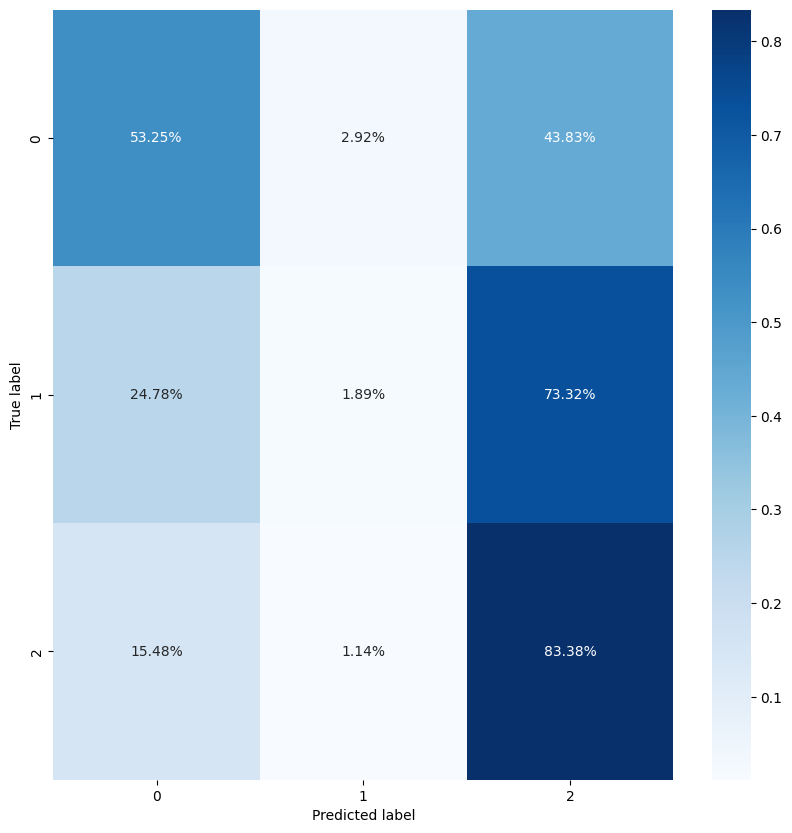

              precision    recall  f1-score   support

           0       0.04      0.53      0.08       308
           1       0.21      0.02      0.03      3010
           2       0.87      0.83      0.85     18425

    accuracy                           0.72     21743
   macro avg       0.37      0.46      0.32     21743
weighted avg       0.76      0.72      0.73     21743

0.7166904291036196


In [266]:
# plot the confusion matrix for the model 


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(testoutput_encoded, axis=1)
cm = confusion_matrix(y_test, y_pred)
# plot the confusion matrix for the model with percentage values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


## apply k-fold cross validation

In [267]:
from sklearn.model_selection import KFold



def kfold_cross_validation(X,y,class_weights):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cvscores = []
    for train, test in kfold.split(X, y):
        output_train_encoded = to_categorical(y[train])
        output_cv_encoded = to_categorical(y[test])
        model,history = MULTI_MLP(X[train],output_train_encoded,X[test],output_cv_encoded,class_weights)
        scores = model.evaluate(X[test], output_cv_encoded, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    


In [268]:
kfold_cross_validation(X,y,class_weights)

Epoch 1/10
5436/5436 [==============================] - 71s 5ms/step - loss: 1.1008 - accuracy: 0.0296 - val_loss: 1.1009 - val_accuracy: 0.0236
Epoch 2/10
5436/5436 [==============================] - 27s 5ms/step - loss: 1.1008 - accuracy: 0.0188 - val_loss: 1.1007 - val_accuracy: 0.0220
Epoch 3/10
5436/5436 [==============================] - 30s 5ms/step - loss: 1.1007 - accuracy: 0.0198 - val_loss: 1.1006 - val_accuracy: 0.0327
Epoch 4/10
5436/5436 [==============================] - 27s 5ms/step - loss: 1.1007 - accuracy: 0.0367 - val_loss: 1.1005 - val_accuracy: 0.0339
Epoch 5/10
5436/5436 [==============================] - 26s 5ms/step - loss: 1.1006 - accuracy: 0.0359 - val_loss: 1.1003 - val_accuracy: 0.0338
Epoch 6/10
5436/5436 [==============================] - 24s 4ms/step - loss: 1.1006 - accuracy: 0.0514 - val_loss: 1.1002 - val_accuracy: 0.0531
Epoch 7/10
5436/5436 [==============================] - 23s 4ms/step - loss: 1.1006 - accuracy: 0.0547 - val_loss: 1.1000 - val_ac

# Logisitic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_recall_fscore_support

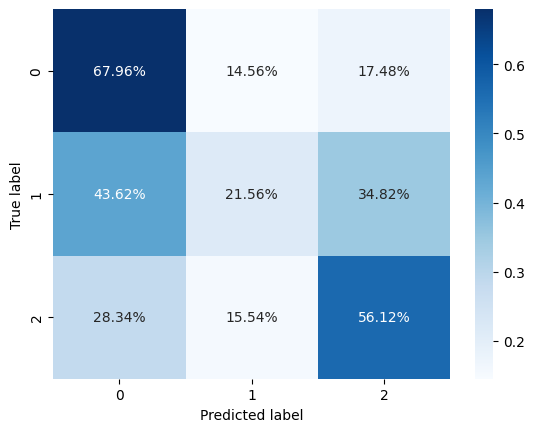

In [215]:
# train the model with the best parameters and evaluate it on the test dataset
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)

logistic_reg = LogisticRegression(C=0.32, max_iter=1000, class_weight=class_weights, solver='saga' )
logistic_reg.fit(X_train_poly, y_train)

y_cv_pred = logistic_reg.predict(X_cv_poly)
# plot the confusion matrix in percentage
cm = confusion_matrix(y_cv, y_cv_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [216]:
# calculate evaluation metrics for the model accuracy, precision, recall, f1 score
accuracy = accuracy_score(y_cv, y_cv_pred)
print("Accuracy:", accuracy)


# calculate precision, recall, f1 score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_cv, y_cv_pred, average='macro')


Accuracy: 0.5150163270937773


(0.3724236828426055, 0.4854654937305312, 0.3165260049730241, None)

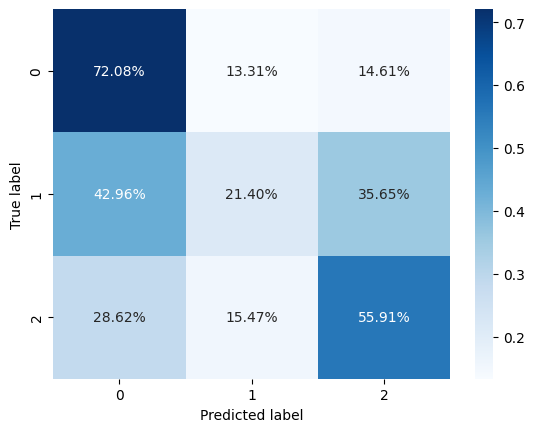

In [217]:
# test the model on the test dataset
X_test_poly = poly.transform(X_test)
y_test_pred = logistic_reg.predict(X_test_poly)

# plot the confusion matrix in percentage
cm = confusion_matrix(y_test, y_test_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [218]:
# calculate evaluation metrics for the model accuracy, precision, recall, f1 score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


# calculate precision, recall, f1 score
precision_recall_fscore_support(y_test, y_test_pred, average='macro')

Accuracy: 0.5135905808766039


(0.3723237255075243, 0.49793668324039725, 0.3165587008723407, None)

## KNN Classification Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
features = df_Encoded_and_scaled[["speed_limit",'light_conditions_Darkness - lights lit','light_conditions_Darkness - lights unlit','light_conditions_Darkness - no lighting','light_conditions_Daylight',"number_of_vehicles","number_of_casualties","weather_conditions",
"road_surface_conditions"]].values
labels = df_Encoded_and_scaled["accident_severity"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
score = 0
best_used_k = 0
# Loop through different values of k (2, 4, 6, 8)
for k in range(2, 10, 2):
    # Create a K-Nearest Neighbors classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier using the training data
    knn.fit(X_train, y_train)
    # Predict the labels for the testing data
    y_pred_KNN = knn.predict(X_test) 
    # Calculate the accuracy of the model using the predicted labels and the actual labels
    accuracy_KNN= accuracy_score(y_test, y_pred_KNN)
    # Print the accuracy and the current value of k
    print("accuracy = ",accuracy_KNN)
    print("k =",k)
    # Check if the current accuracy is higher than the previous best accuracy
    if (accuracy_KNN > score):
    # Update the best accuracy and the corresponding k value
        score = accuracy_KNN
        best_used_k = k
# Print the highest accuracy achieved and the corresponding k value
print(f'high accuracy {score} using k: {best_used_k}' ) 

accuracy =  0.6240169249873523
k = 2
accuracy =  0.7880007358690153
k = 4
accuracy =  0.7667525180517868
k = 6
accuracy =  0.8450075886492204
k = 8
high accuracy 0.8450075886492204 using k: 8


## Naive Bayes Classifier

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [71]:
# X refers to features, y refers to target variable
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

# Create an instance of the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(naive_bayes, param_grid, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
naive_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Train the Naive Bayes classifier
naive_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [75]:
# Make predictions + performing confusion matrix
y_pred_NaiveBayes = naive_model.predict(X_test)

# Perform cross-validation with number of folds = 5 
cross_val_scores = cross_val_score(naive_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)

# Evaluate the model's performance
accuracy_NaiveBayes= accuracy_score(y_test, y_pred_NaiveBayes)
print("Accuracy:", accuracy_NaiveBayes)

Cross-Validation Scores: [0.84779895 0.84779895 0.8477661  0.8477661  0.84779395]
Accuracy: 0.846418004261908
